In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

In [11]:
img_size = 256
data = []
categories = ['mammooty','mohanlal']

directories = ['./dataset/mammooty', './dataset/mohanlal']

for directory in directories:
    for img in os.listdir(directory):
        img_path = os.path.join(directory, img)
        category_label = directory.split('/')[-1]
        label = categories.index(category_label)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr,(img_size,img_size))
        data.append([img_arr,label])
        
# Adds labels to images

In [12]:
random.shuffle(data)

In [13]:
x = []
y = []

for features, labels in data:
    x.append(features)
    y.append(labels)
    
# Seperating featuers and labels

In [14]:
x = np.array(x)
y = np.array(y)

# Array

In [15]:
y

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,

In [16]:
x.shape

(994, 256, 256, 3)

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import keras

# VGG19

In [18]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import models, layers

vgg16 = VGG16(
            include_top=False,
            weights='./vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
            input_shape=(256,256,3),
        )

In [19]:
model = models.Sequential()
model.add(vgg16)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
for layer in vgg16.layers:
    layer.trainable = False

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 23103809 (88.13 MB)
Trainable params: 8389121 (32.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [24]:
history = model.fit(x, y, epochs=10, validation_split=0.2)

Epoch 1/10
25/25 [==============================] - 74s 3s/step - loss: 0.4548 - accuracy: 0.9610 - val_loss: 0.7213 - val_accuracy: 0.9548
Epoch 2/10
25/25 [==============================] - 74s 3s/step - loss: 0.1313 - accuracy: 0.9799 - val_loss: 0.3032 - val_accuracy: 0.9648
Epoch 3/10
25/25 [==============================] - 76s 3s/step - loss: 0.0203 - accuracy: 0.9950 - val_loss: 0.2664 - val_accuracy: 0.9749
Epoch 4/10
25/25 [==============================] - 75s 3s/step - loss: 0.0164 - accuracy: 0.9925 - val_loss: 0.2611 - val_accuracy: 0.9749
Epoch 5/10
25/25 [==============================] - 75s 3s/step - loss: 0.0203 - accuracy: 0.9950 - val_loss: 0.2700 - val_accuracy: 0.9749
Epoch 6/10
25/25 [==============================] - 75s 3s/step - loss: 0.0087 - accuracy: 0.9975 - val_loss: 0.2534 - val_accuracy: 0.9698
Epoch 7/10
25/25 [==============================] - 74s 3s/step - loss: 0.0050 - accuracy: 0.9987 - val_loss: 0.2688 - val_accuracy: 0.9749
Epoch 8/10
25/25 [==

In [25]:
acc = model.evaluate(x,y)
print("Accuracy: ", (acc[1]*100))

32/32 [==============================] - 73s 2s/step - loss: 0.0604 - accuracy: 0.9950
Accuracy:  99.49698448181152


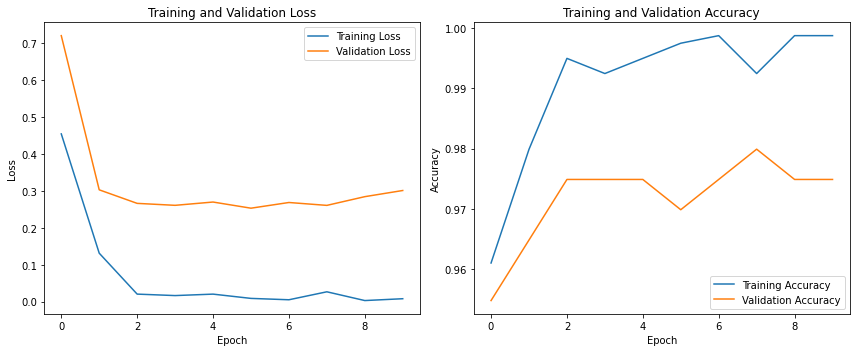

In [26]:
import matplotlib.pyplot as plt

training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [1]:
model.save('./VGG19.keras',save_format = 'h5')

In [4]:
model = keras.models.load_model('VGG19.keras')

In [5]:
def load_image(path):
    img = cv2.imread(path)
    new_img = cv2.resize(img, (256,256))
    new_img = np.array(new_img)
    new_img = new_img.reshape(-1,256,256,3)
    return new_img

# Preprocessing user input image

1/1 [==============================] - 0s 213ms/step

 Prediction:  Mammooty


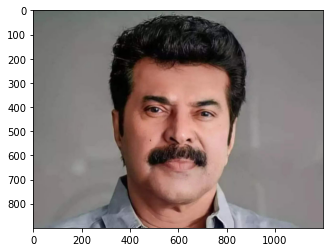

In [7]:
image = './test/mammooty.jpg'
image2 = './test/mohanlal.jpg'

img = image

result = model.predict([load_image(img)])

if result[0][0] > 0.8:
    predict = 'Mohanlal'
else:
    predict = 'Mammooty'

print('\n Prediction: ',predict)
plt.imshow(cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB))